In [299]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.io as sio

In [300]:
col = ["ID","Default","SP500","TreasuryRate","DTDLevel","DTDTrend","Cash/TALevel","Cash/TATrend"
      ,"NI/TALevel","NI/TATrend","SizeLevel","SizeTrend","M/B","SIGMA","MediaSentimentScore"]
data = pd.read_excel("2808x15.xlsx",header = None)
data.columns = col
data.head()

,ID,Default,SP500,TreasuryRate,DTDLevel,DTDTrend,Cash/TALevel,Cash/TATrend,NI/TALevel,NI/TATrend,SizeLevel,SizeTrend,M/B,SIGMA,MediaSentimentScore
0,29914,0,0.105748,5.781667,2.991237,-0.304599,0.005914,-0.000994,0.008041,0.003846,-6.169169,0.007151,1.486400,0.036054,1.498164
1,28534,0,0.080355,0.143333,2.774796,-0.190453,0.001935,-0.000613,0.013437,-0.022110,-4.645193,-0.303917,2.358707,0.122560,1.098612
2,30383,0,-0.233859,1.064167,6.639440,-0.426534,0.120863,-0.061333,0.019804,-0.004771,-3.567252,0.001180,1.949723,0.086757,1.386294
3,31500,0,0.060460,3.265000,10.520049,1.675419,0.078752,0.048442,0.067335,-0.002979,-5.213275,-0.050929,7.015260,0.087311,2.079442
4,28432,0,-0.180336,1.369167,7.599402,-2.004519,0.229821,0.028242,0.035658,0.002757,1.685995,-0.024760,5.117003,0.050768,1.194506


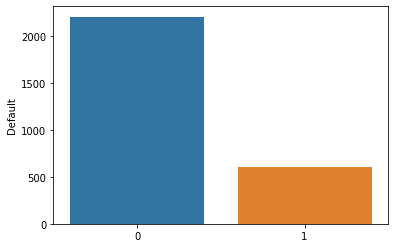

In [349]:
dtable = data.Default.value_counts() #違約與未違約比例
sns.barplot(dtable.index, dtable)

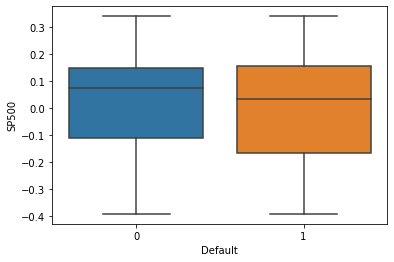

In [350]:
sns.boxplot("Default" , "SP500" ,data = data) #違約與未違約公司總體環境素質

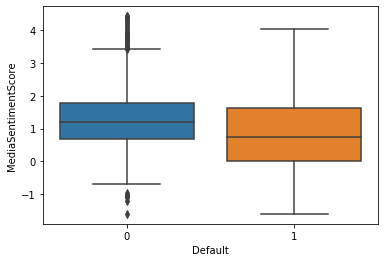

In [351]:
sns.boxplot("Default" , "MediaSentimentScore" ,data = data) #違約與未違約公司媒體情指標

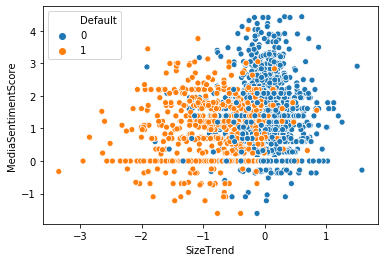

In [357]:
sns.scatterplot("SizeTrend", "MediaSentimentScore","Default",data=data) #公司成長趨勢與媒體情感指標

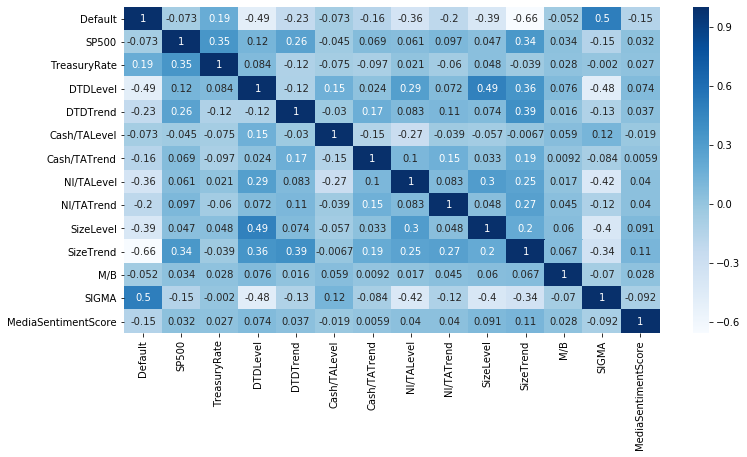

In [345]:
cor = data.iloc[:,1:].corr() #各變數相關性
plt.figure(figsize=(12,6))
sns.heatmap(cor,cmap='Blues',annot=True)